In [9]:
import numpy as np
import torch

from torch.nn import functional as F

from news_vec.encoder import read_preds

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [112]:
df, embeds = read_preds('../data/ava-lstm/')

100%|██████████| 283/283 [00:15<00:00, 18.48it/s]


In [120]:
df1 = df[df.domain=='thehill.com']
df2 = df[df.domain=='dailycaller.com']

In [121]:
d1_embeds = embeds[df1.index]
d2_embeds = embeds[df2.index]

In [122]:
idx1 = np.random.choice(range(len(d1_embeds)), 1000000)
idx2 = np.random.choice(range(len(d2_embeds)), 1000000)

x1 = torch.from_numpy(d1_embeds[idx1])
x2 = torch.from_numpy(d2_embeds[idx2])

ds = F.cosine_similarity(x1, x2)
ds = -(ds.numpy() - 1)

In [123]:
ds

array([0.50905025, 0.9741248 , 0.8717294 , ..., 0.45776117, 1.2275153 ,
       0.9101112 ], dtype=float32)

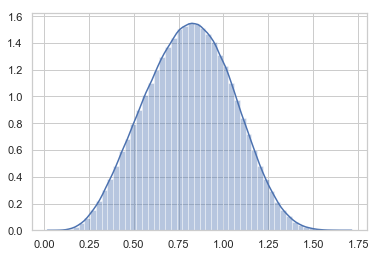

In [124]:
sns.distplot(ds)

In [125]:
close_idxs = np.argsort(ds)[:100]

In [126]:
for i1, i2 in zip(idx1[close_idxs], idx2[close_idxs]):
    print(' '.join(df1.iloc[i1].clf_tokens), '----', ' '.join(df2.iloc[i2].clf_tokens))

pompeo called to white house after meeting with bolton haley cancelled ---- house intel committee to hold hearing amid tense standoff over trump dossier
we will grow our majority in midterms ---- we will overcome together as americans
first house dem calls on conyers to resign ---- dem reads trump tweets during sessions hearing
dems want rohrabacher pulled from leadership of panel overseeing russia ---- dems fear bitterly disappointing loss in georgia special election
i do nt consider myself a democrat ---- i do nt think murder should be legal
dem senator calls for action on guns in first floor speech ---- dems slated to introduce bill providing green cards to illegal
conservative groups urge house members to back transformative tax reform ---- congress set to defund planned parenthood in aggressive legislative push
trump will absolutely ban muslims ---- trump could be attacking me because i m black
trump regrets decision to fire flynn ---- trump responds to letter from bush family
we 